Libraries that I am trying to import

In [4]:
% matplotlib inline
from googleplaces import GooglePlaces, types, lang
import googlemaps
from datetime import datetime
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopy

API key that has google places and google geolocation permissions turned on

In [5]:
API_KEY = input()
google_places = GooglePlaces(API_KEY)
gmaps = googlemaps.Client(key = API_KEY)

Example query for Apple Stores

In [6]:
qr_apple = google_places.nearby_search(location = 'New York City, New York', keyword='Apple')
places_dict = {}
for pl in qr_apple.places:
    places_dict[pl.name] = pl.geo_location
places_dict

{'Apple SoHo': {'lat': Decimal('40.725058'),
  'lng': Decimal('-73.99902899999999')},
 'Apple Downtown Brooklyn': {'lat': Decimal('40.6856274'),
  'lng': Decimal('-73.97822069999999')},
 'Apple World Trade Center': {'lat': Decimal('40.7119149'),
  'lng': Decimal('-74.0115029')},
 'Apple West 14th Street': {'lat': Decimal('40.74127'),
  'lng': Decimal('-74.00538899999999')},
 'Apple Retail Regional Office': {'lat': Decimal('40.7369664'),
  'lng': Decimal('-73.99317549999999')},
 'EGT Computer Repairs & Tutorials': {'lat': Decimal('40.6928437'),
  'lng': Decimal('-73.98213059999999')},
 'Windy Apple Technologies': {'lat': Decimal('40.73771610000001'),
  'lng': Decimal('-73.98871009999999')}}

In [7]:
# Webscrape this article to get list of the top most valuable tech companies in America.

from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)

In [8]:
# Webscrape this article to get list of the top most valuable tech companies in America.
raw_html = simple_get('http://www.businessinsider.com/amazon-google-apple-most-valuable-tech-brands-america-2018-6')
soup = BeautifulSoup(raw_html, 'html.parser')
companies = soup.find_all("h2", class_="slide-title-text")
company_text = [company.text for company in companies]
company_text = [company.split(".")[1].strip() for company in company_text]
print(company_text)

['Qualcomm', 'Western Digital', 'eBay', 'Adobe', 'HPE', '3M', 'HP', 'booking', 'NETFLIX', 'Dell', 'Uber', 'Cisco', 'Intel', 'YouTube', 'Oracle', 'IBM', 'Microsoft', 'Facebook', 'Google', 'Apple', 'Amazon']


In [9]:
tech_place_dict = {}
tech_query_string = '{} office in New York City'
for tech_company in company_text:
    #print(tech_query_string.format(tech_company))
    tech_place_dict[tech_company] = google_places.text_search(query = tech_query_string.format(tech_company))

In [160]:
import pprint

pp = pprint.PrettyPrinter()

com = 'Oracle'
#pp.pprint(tech_place_dict[com].places)
#tech_place_dict[com].places[0].get_details()

#pp.pprint(tech_place_dict[com].places[0].details)
#print(tech_place_dict[com].places[0].name)
#print(tech_place_dict[com].places[0].website)
#print(tech_place_dict[com].places[0].details)

geopd_companies = pd.DataFrame(columns=['company_name', 'latitude', 'longitude'])
#print(geopd_companies)

for tech_company in tech_place_dict:
    #print(tech_company)
    count = 2
    for place in tech_place_dict[tech_company].places:
        score = 0
        place.get_details()
        if tech_company.lower() in place.name.lower():
            score += 1
        if (tech_company.lower() + ".com") in str(place.website).lower():
            score += 1
        if score == 2:
            #print(place.name)
            #print(place)
            row = pd.Series({'company_name':tech_company, 'latitude':place.geo_location['lat'], 'longitude':place.geo_location['lng']})
            geopd_companies = geopd_companies.append(row, ignore_index=True)

geopd_companies

,company_name,latitude,longitude
0,Adobe,40.7580514,-73.98484359999999
1,Adobe,40.7370935,-73.99317739999999
2,NETFLIX,40.7411942,-73.9998109
3,Dell,40.7087649,-74.01107890000002
4,Dell,40.7014962,-74.0091697
5,Uber,40.7525708,-74.0064938
6,Uber,40.7420812,-73.9355099
7,Uber,40.8380979,-73.8833025
8,Cisco,40.7511838,-73.9921394
9,Cisco,40.7582816,-73.9811845


In [163]:
geopd_companies['coordinates'] = list(zip(geopd_companies['longitude'], geopd_companies['latitude']))
geopd_companies['coordinates'] = geopd_companies['coordinates'].apply(Point)
gpd_com = gpd.GeoDataFrame(geopd_companies).set_geometry('coordinates')

gpd_com['latitude'] = pd.to_numeric(gpd_com['latitude'])
gpd_com['longitude'] = pd.to_numeric(gpd_com['longitude'])
gpd_com['company_name'] = gpd_com['company_name'].astype('str')

#test = pd.to_numeric(gpd_com['longitude'])
#test

In [ ]:
gpd_com.to_file("companies.geojson", driver='GeoJSON')

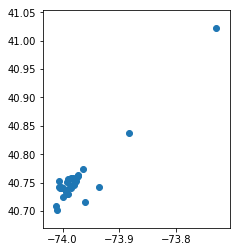

In [166]:
companies = gpd.read_file('companies.geojson')
companies.plot()

In [88]:
def df_to_geojson(df, properties, lat='latitude', lon='longitude'):
    geojson = {'type':'FeatureCollection', 'features':[]}
    for _, row in df.iterrows():
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
        feature['geometry']['coordinates'] = [row[lon],row[lat]]
        for prop in properties:
            feature['properties'][prop] = row[prop]
        geojson['features'].append(feature)
    return geojson

In [41]:
#qr_tech = google_places.text_search(query = 'Dell office in New York City')
#dell_office = qr_tech.places[1]
#dell_office.geo_location['lat']
#dell_office.places
#dell_office = qr_tech.places[1]
#dell_office.get_details()
#dell_office.details

Decimal('40.75007189999999')